<a href="https://colab.research.google.com/github/susej2/AlgoritmosOptimizacion/blob/main/Algoritmos_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 1

Nombre: Jesus Martinez Alvarado <br>
Github: https://github.com/susej2/AlgoritmosOptimizacion <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [1]:
# Torres de Hanoi

def torres_de_hanoi(n, origen, destino, auxiliar):
    if n == 1:
        # Caso base: Mover una ficha de la torre de origen a la torre de destino
        print(f"Mover ficha 1 de la torre {origen} a la torre {destino}")
        return
    else:
        # Mover n-1 fichas de la torre de origen a la torre auxiliar
        torres_de_hanoi(n-1, origen, auxiliar, destino)

        # Mover la ficha restante de la torre de origen a la torre de destino
        print(f"Mover ficha {n} de la torre {origen} a la torre {destino}")

        # Mover las n-1 fichas de la torre auxiliar a la torre de destino
        torres_de_hanoi(n-1, auxiliar, destino, origen)

# Ejemplo de uso con 9 fichas
numero_de_fichas = 6
torres_de_hanoi(numero_de_fichas, 'Inicio', 'Intermedio', 'Destino')



Mover ficha 1 de la torre Inicio a la torre Destino
Mover ficha 2 de la torre Inicio a la torre Intermedio
Mover ficha 1 de la torre Destino a la torre Intermedio
Mover ficha 3 de la torre Inicio a la torre Destino
Mover ficha 1 de la torre Intermedio a la torre Inicio
Mover ficha 2 de la torre Intermedio a la torre Destino
Mover ficha 1 de la torre Inicio a la torre Destino
Mover ficha 4 de la torre Inicio a la torre Intermedio
Mover ficha 1 de la torre Destino a la torre Intermedio
Mover ficha 2 de la torre Destino a la torre Inicio
Mover ficha 1 de la torre Intermedio a la torre Inicio
Mover ficha 3 de la torre Destino a la torre Intermedio
Mover ficha 1 de la torre Inicio a la torre Destino
Mover ficha 2 de la torre Inicio a la torre Intermedio
Mover ficha 1 de la torre Destino a la torre Intermedio
Mover ficha 5 de la torre Inicio a la torre Destino
Mover ficha 1 de la torre Intermedio a la torre Inicio
Mover ficha 2 de la torre Intermedio a la torre Destino
Mover ficha 1 de la to

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [3]:
#Sucesión_de_Fibonacci
# le pasamos 5
def fibonacci_iterativo(n):
    if n <= 1:
        return n # valida si el numero es 1 o menor 0 devuelve ese numero

    # son los dos primeros numeros de la serie
    actual = 0
    next = 1
    suma = 0

    for i in range(2, n + 1):
      # hacemos la suma de los dos anteriores
      suma = actual + next
      # se mueven al siguiente valor
      actual = next
      next = suma

    return suma

def fibonacci_recursivo(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursivo(n - 1) + fibonacci_recursivo(n - 2)




In [6]:
print(fibonacci_iterativo(7))

13


In [7]:
pip install matplotlib

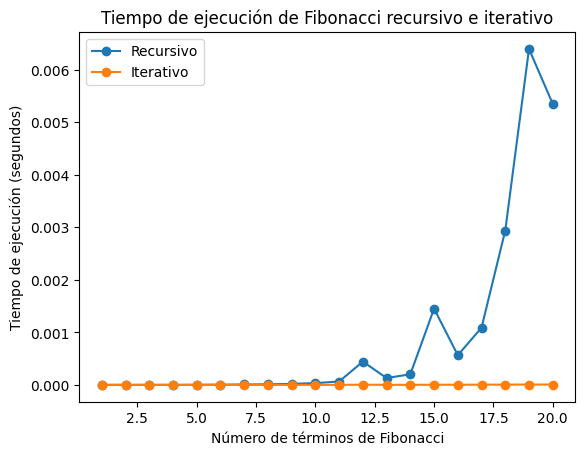

In [8]:
import time
import matplotlib.pyplot as plt

def tiempo_ejecucion(funcion, *args):
    inicio = time.time()
    resultado = funcion(*args)
    fin = time.time()
    tiempo_total = fin - inicio
    return resultado, tiempo_total

n_valores = list(range(1, 21))  # Números de términos para los que calcular Fibonacci
tiempos_recursivos = []
tiempos_iterativos = []

for n in n_valores:
    _, tiempo_recursivo = tiempo_ejecucion(fibonacci_recursivo, n)
    _, tiempo_iterativo = tiempo_ejecucion(fibonacci_iterativo, n)

    tiempos_recursivos.append(tiempo_recursivo)
    tiempos_iterativos.append(tiempo_iterativo)

# Graficar los resultados
plt.plot(n_valores, tiempos_recursivos, label='Recursivo', marker='o')
plt.plot(n_valores, tiempos_iterativos, label='Iterativo', marker='o')
plt.xlabel('Número de términos de Fibonacci')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de Fibonacci recursivo e iterativo')
plt.legend()
plt.show()


## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [ ]:
# Problema del cambio de moneda

def cambio_moneda(cantidad, monedas):
  monedas.sort(reverse=True) # ordenamos de forma descendente
  cambio = {} # diccionario el cual almacena el cambio

  for moneda in monedas:
      while cantidad >= moneda:
        # Si la cantidad es mayor o igual a la moneda entonces lo restamos y lo agregamos al cambio
        cantidad -= moneda
        cambio[moneda] = cambio.get(moneda, 0) + 1

  return cambio

cantidad = 2545
tipos_monedas = [25, 10, 5, 1]

resultado_cambio = cambio_moneda(cantidad, tipos_monedas)

print(f"Cambio para {cantidad} usando monedas {tipos_monedas}: serian:  {resultado_cambio}")




Cambio para 2545 usando monedas [25, 10, 5, 1]: serian:  {25: 101, 10: 2}


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [ ]:
# Problema de las N-Reinas


def es_seguro(tablero, fila, columna, n):
    # Verifica si es seguro colocar una reina en la posición (fila, columna)

    # Verifica la fila en la misma columna
    for i in range(fila):
        if tablero[i] == columna or \
           tablero[i] - i == columna - fila or \
           tablero[i] + i == columna + fila:
            return False

    return True

def resolver_n_reinas_util(tablero, fila, n, soluciones):
    if fila == n:
        # Todas las reinas han sido colocadas, añade la solución al resultado
        soluciones.append(list(tablero))
        return

    for columna in range(n):
        if es_seguro(tablero, fila, columna, n):
            tablero[fila] = columna
            resolver_n_reinas_util(tablero, fila + 1, n, soluciones)
            tablero[fila] = -1  # Retrocede (backtrack) para explorar otras posibilidades

def resolver_n_reinas(n):
    soluciones = []
    tablero = [-1] * n
    resolver_n_reinas_util(tablero, 0, n, soluciones)
    return soluciones

# Ejemplo de uso para un tablero de 8x8
n = 5
soluciones = resolver_n_reinas(n)

# Imprime la primera solución encontrada
if soluciones:
    print("Primera solución encontrada:")
    print(soluciones[0])
else:
    print("No hay soluciones para el tablero de", n, "x", n)




Primera solución encontrada:
[0, 2, 4, 1, 3]
